<a href="https://colab.research.google.com/github/abdullahkhafabi-010/PCVK/blob/main/WEEK5/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Abdullah Khafabi

Nim: 2041720050

Kelas: 3A

# MODUL 5 – Operasi Aritmatika dan Logika - Gamma Correction, Image Depth, PSNR, Average Denoising, Image Masking

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Buat Gamma Correction

Gamma Correction pada citra
--------------------------------
masukkan nilai Gamma : 3


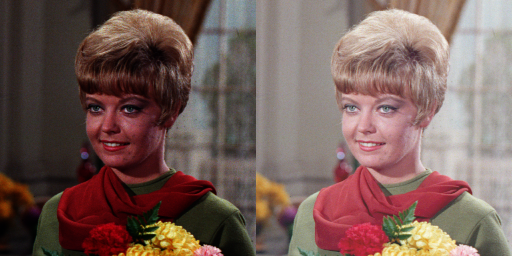

In [2]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow

#gamma correction ialah teknik yang digunakan untuk memodifikasi kontrast dan kecerahan citra dengan mengubah nilai-nilai piksel berdasarkan fungsi eksponensial.

print ('Gamma Correction pada citra')
print ('--------------------------------')
try:
  gamma = int(input('masukkan nilai Gamma : '))
except ValueError:
  print('error, not a number')

# Membaca citra
original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')

# Normalisasi piksel ke dalam rentang [0, 1]
normalisasi_gambar = original / 255

# Melakukan operasi koreksi gamma
hasil = np.power(normalisasi_gambar, 1 / gamma)

# Mengembalikan piksel ke rentang [0, 255]
hasil = (hasil * 255).astype('uint8')

final_frame = cv.hconcat((original, hasil))
cv2_imshow(final_frame)

Buat Simulasi Image Depth

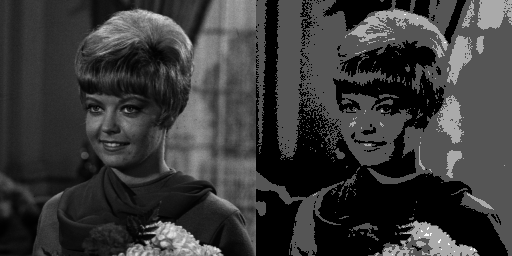

In [5]:
# Import library yang diperlukan
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np

# Definisikan kedalaman bit (bit_depth)
bit_depth = 2

# Hitung nilai level yang digunakan untuk normalisasi citra
level = 255 / (pow(2, bit_depth) - 1)

# Membaca citra grayscale dari Google Drive
original1 = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff', cv.IMREAD_GRAYSCALE)

# Membuat citra baru dengan ukuran yang sama dengan citra grayscale asli
depth_image = np.zeros(original1.shape, original1.dtype)

# Melakukan reduksi kedalaman bit per piksel dengan looping
for y in range(original1.shape[0]):
  for x in range(original1.shape[1]):
    # Menghitung nilai intensitas piksel yang baru dengan melakukan pembagian dan pembulatan
    depth_image[y, x] = np.clip(round(original1[y, x] / level) * level, 0, 255)

# Menggabungkan citra grayscale asli dan citra yang telah mengalami reduksi kedalaman bit secara horizontal
final_frame = cv.hconcat((original1, depth_image))

# Menampilkan citra yang telah mengalami reduksi kedalaman bit
cv2_imshow(final_frame)

Buat modul Average Denoising

Nilai PSNR untuk Jumlah Citra di Average 5 adalah 27.53955947660608 (dB)


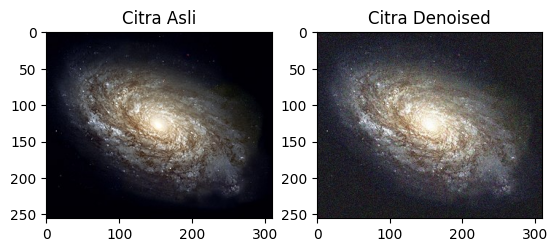



Nilai PSNR untuk Jumlah Citra di Average 10 adalah 27.55386879544148 (dB)


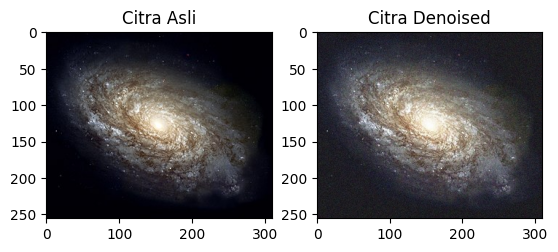



Nilai PSNR untuk Jumlah Citra di Average 20 adalah 27.540764770973585 (dB)


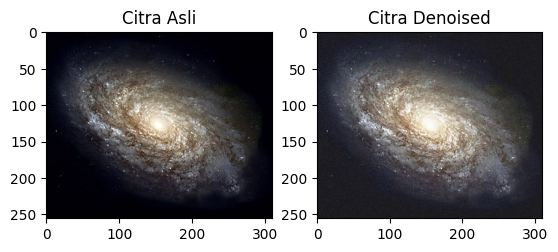



Nilai PSNR untuk Jumlah Citra di Average 40 adalah 27.510297276641875 (dB)


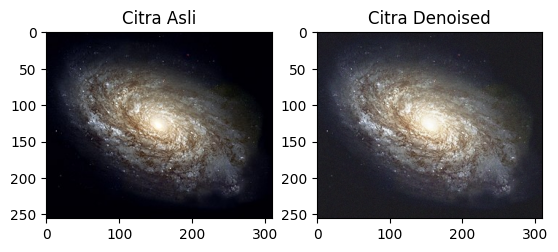



Nilai PSNR untuk Jumlah Citra di Average 80 adalah 27.509215810837976 (dB)


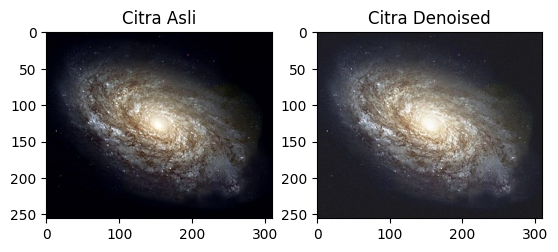



Nilai PSNR untuk Jumlah Citra di Average 100 adalah 27.51477225229575 (dB)


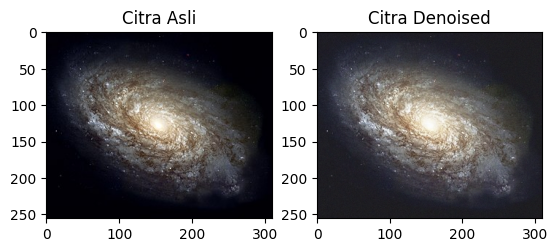

In [23]:
import cv2 as cv
import glob
from math import log10, sqrt
import numpy as np
import matplotlib.pyplot as plt

original = cv.imread('/content/drive/MyDrive/PCVK/Images/galaxy.jpg')
cv_img = []

for img in glob.glob('/content/drive/MyDrive/PCVK/Images/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

# Daftar nilai noise_number yang ingin digunakan
noise_numbers = [4, 9, 19, 39, 79, 99]

for i in noise_numbers:
    dst = cv_img[0]

    for j in range(1, i):
        alpha = 1.0 / (j + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[j], alpha, dst, beta, 0.0)

    def PSNR(original, compressed):
        mse = np.mean((original - compressed) ** 2)
        if mse == 0:
            return 100
        max_pixel = 255.0
        psnr = 20 * log10(max_pixel / sqrt(mse))
        return psnr

    compressed = dst
    psnr = PSNR(original, compressed)

    print(f'Nilai PSNR untuk Jumlah Citra di Average {i+1} adalah {psnr} (dB)')

    # Menampilkan citra dengan matplotlib
    plt.subplot(121), plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB)), plt.title('Citra Asli')
    plt.subplot(122), plt.imshow(cv.cvtColor(compressed, cv.COLOR_BGR2RGB)), plt.title('Citra Denoised')
    plt.show()

    print('\n')

Kode di atas digunakan untuk mengukur efektivitas metode denoising rata-rata pada berbagai jumlah citra rata-rata. Semakin banyak citra yang digunakan dalam proses perataan rata-rata, semakin tinggi nilai PSNR-nya, yang mengindikasikan bahwa denoising rata-rata lebih efektif dalam mengurangi noise pada citra. Dengan kata lain, semakin banyak citra yang digunakan, semakin baik kualitas hasil denoisingnya.

Buat image masking untuk image berikut. Image kiri adalah image asli (image KTP),
sedangkan image paling kanan adalah hasilnya:

Gambar 5 Kelompok 9 dan 10, karena Kelompok 9

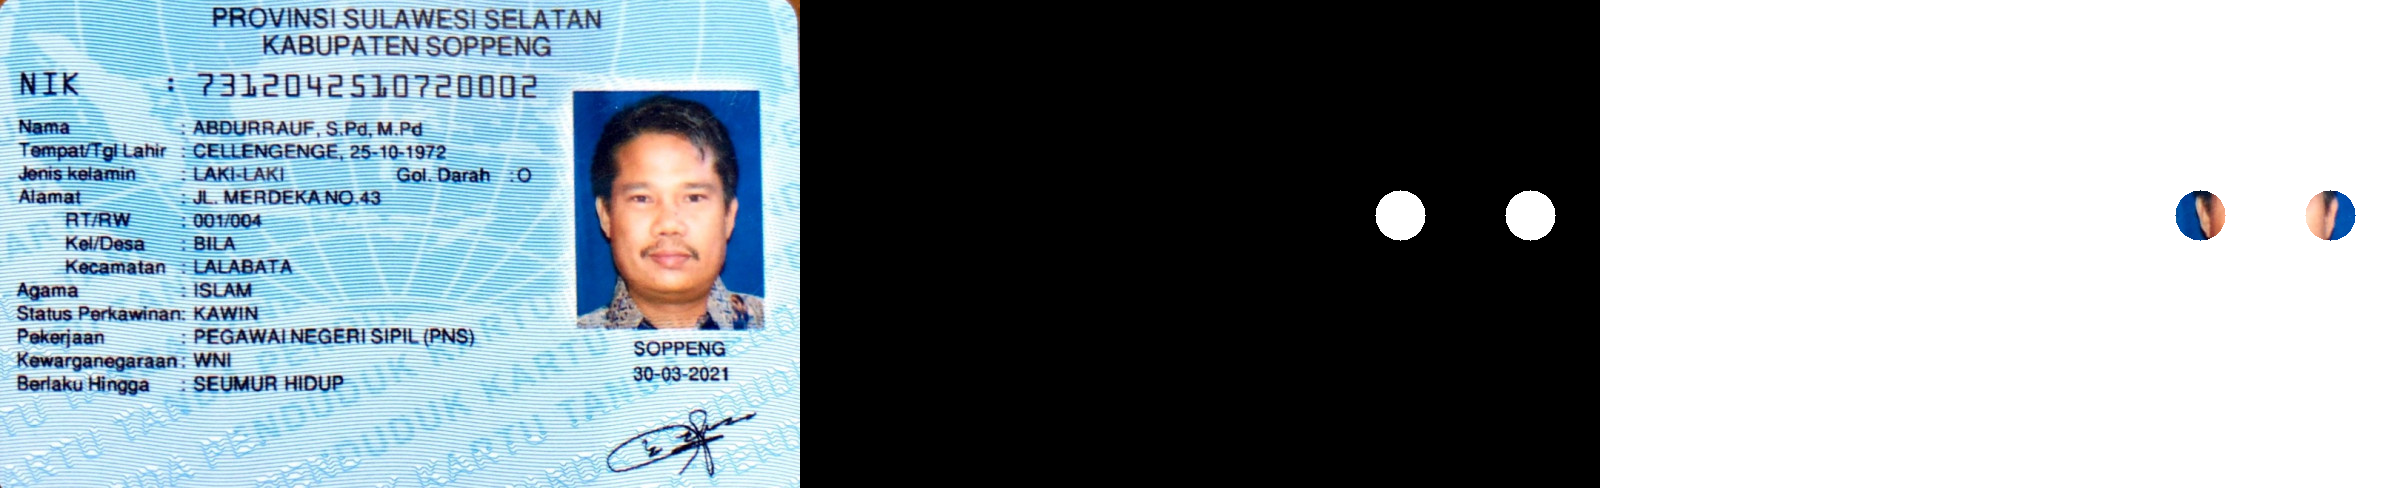

In [34]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpeg')

mask = np.zeros(img.shape, dtype = np.uint8)
mask = cv.circle(mask, (600,215), 25, (255,255,255), -1)

mask2 = np.zeros(img.shape, dtype = np.uint8)
mask2 = cv.circle(mask, (730,215), 25, (255,255,255), -1)

result = img & mask & mask2

result[mask==0] = 255

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini.
Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.

NOT

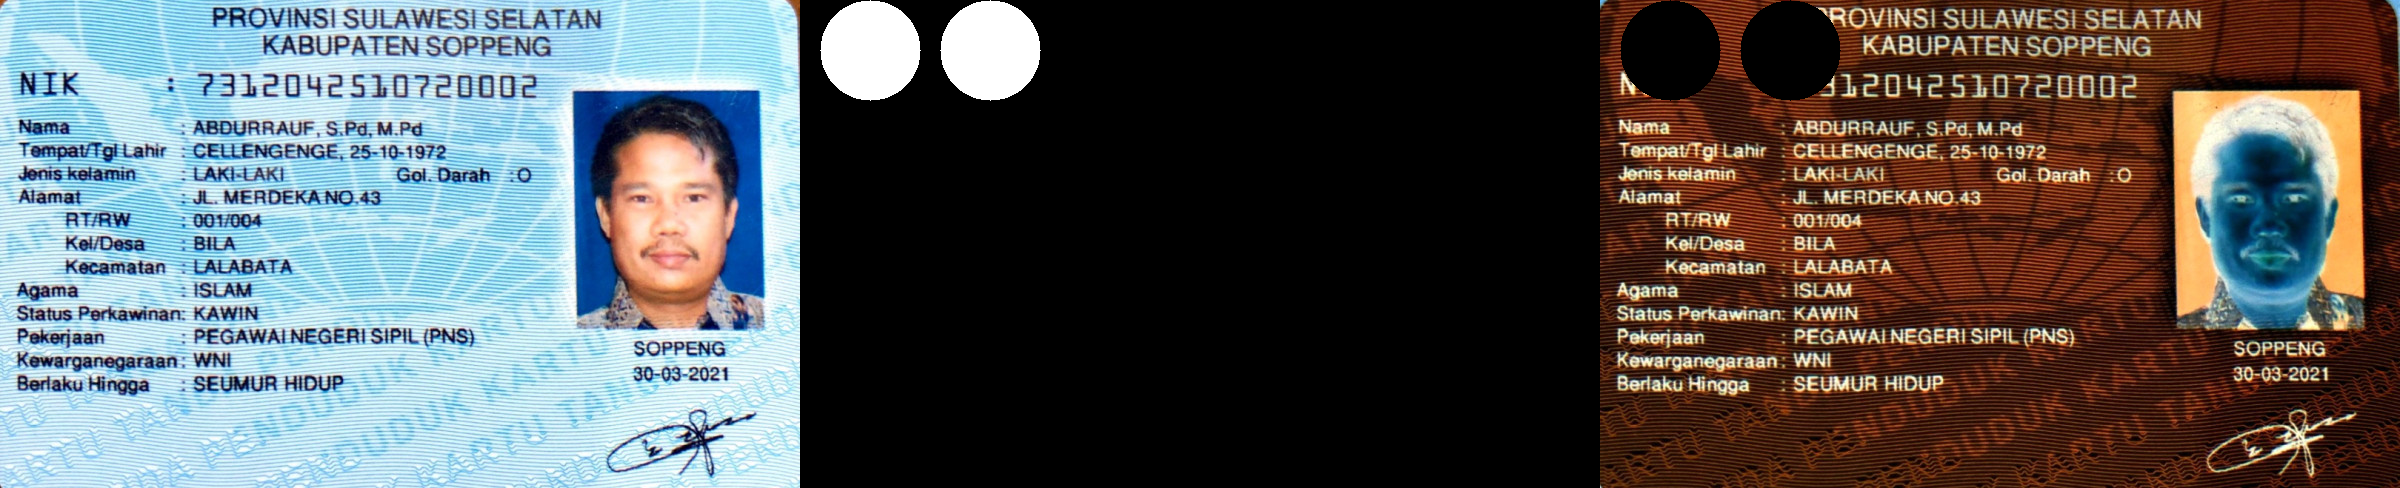

In [35]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpeg')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 50), 50, (255,255,255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask, (190, 50), 50, (255,255,255), -1)

result = ~img & ~mask & ~mask2

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

Gambar img menjadi inverse karna not dari sebuah image merupakan nilai inverse nya dan mask yang berwarna putih menjadi hitam karena nilai not dari mask_not merupakan bagian yang bukan lingkarannya.

OR

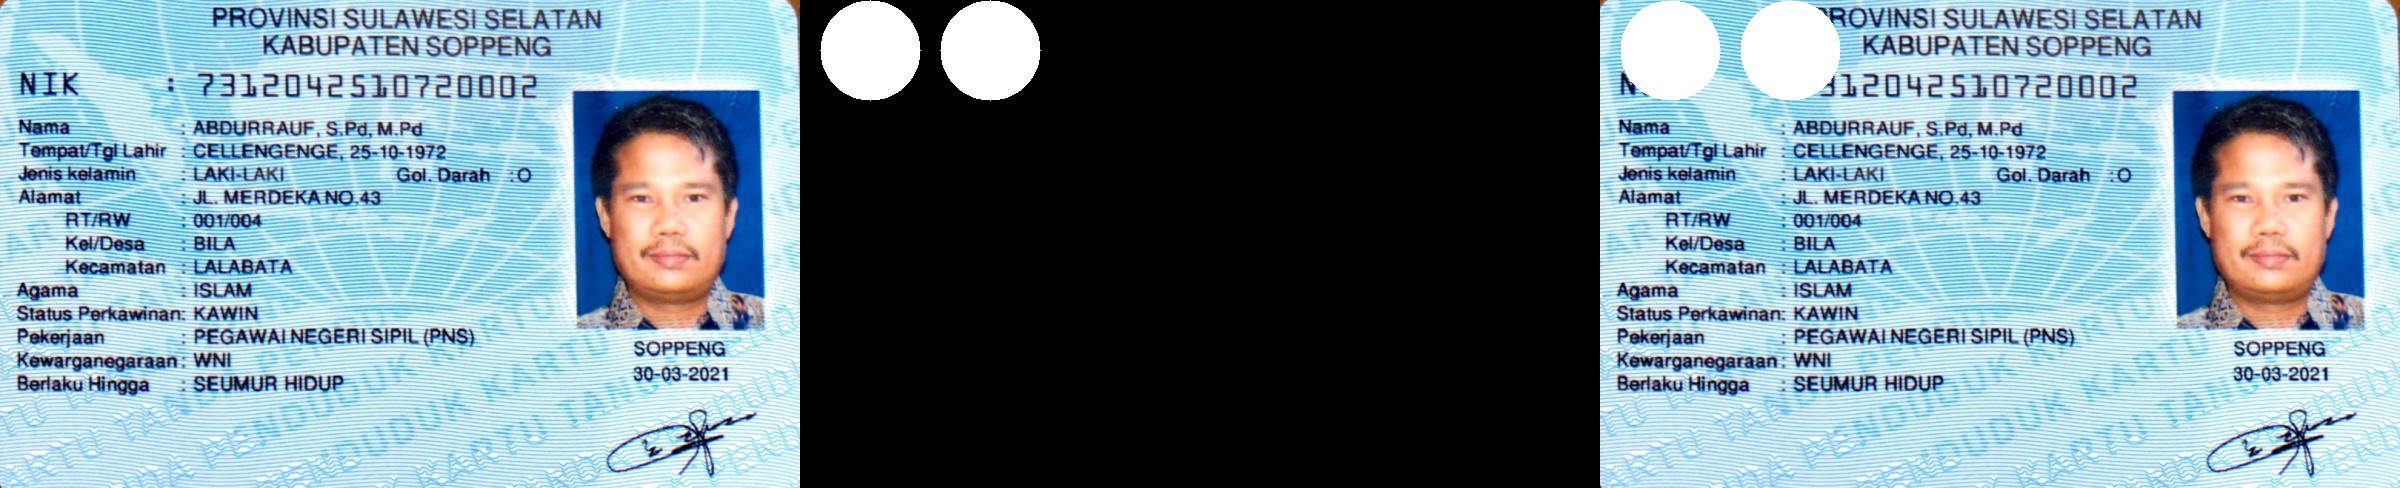

In [36]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpeg')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 50), 50, (255,255,255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask, (190, 50), 50, (255,255,255), -1)

# result = img | mask | mask2
result = cv.bitwise_or(img, mask)

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

Ketika menggunakan operasi OR maka semua bagian yang di img dan bagian lingkaran max memenuhi kebutuhan sehingga img dan max_or akan di gabungkan dan keduanya memenuhi sehingga tampil seluruh img berwarna yang di tumpuk oleh linkaran mask_or.

AND

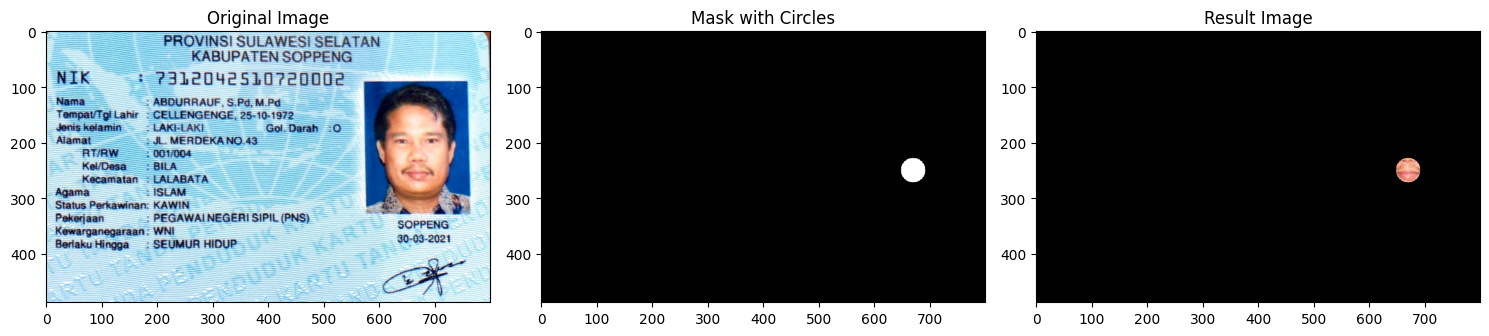

In [37]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpeg')
img = cv.imread(image_path)

mask = np.zeros_like(img)

center_coordinates = (670, 250)
radius1 = 22
color = (255, 255, 255)
thickness = -1
cv.circle(mask, center_coordinates, radius1, color, thickness)

result = img & mask

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(132)
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.title('Mask with Circles')

plt.subplot(133)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.title('Result Image')

plt.tight_layout()
plt.show()


operasi AND memiliki hasil yang sama seperti contoh dimana elemen yang diambil adalah gambar yang memiliki letak bertepatan dengan mask (lingkarannya).

NAND

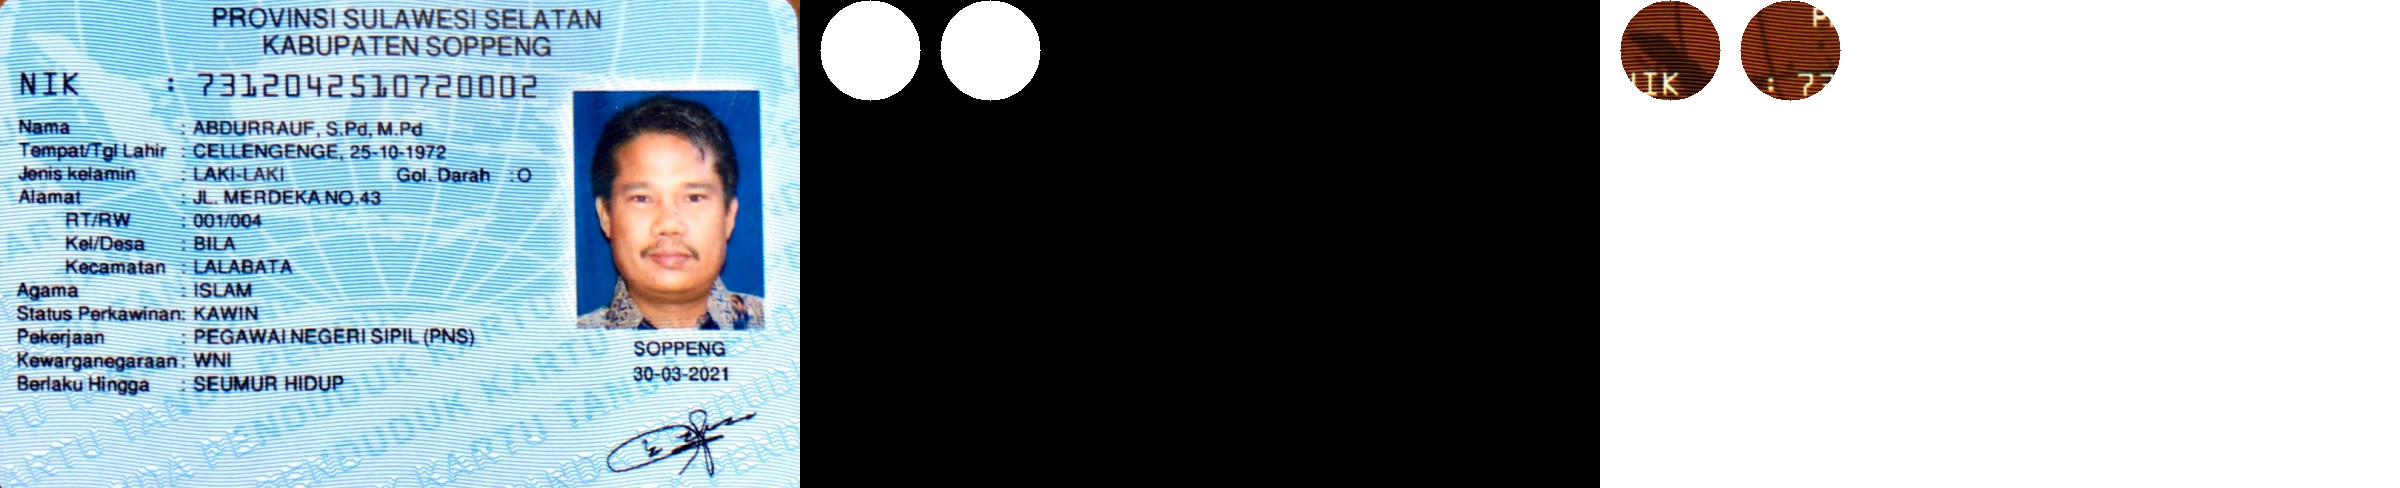

In [39]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpeg')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 50), 50, (255,255,255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask, (190, 50), 50, (255,255,255), -1)

result = ~(img & mask & mask2)

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

operator NAND yaitu melakukan operasi and terlebih dahulu yang menghasilkan gambar yang muncul hanya yang memiliki letak bertepatan dengan mask(lingkaran) setelah itu barulah dilakukan not untuk img dan mask sehingga bagian diluar lingkaranlah yang berwarna putih dan bagian lingkaran menjadi lubang dan ketika di gabungkan dengan img maka akan terlihat bagian img yang memiliki letak sama dengan lingkaran yang lubang tadi.

XOR

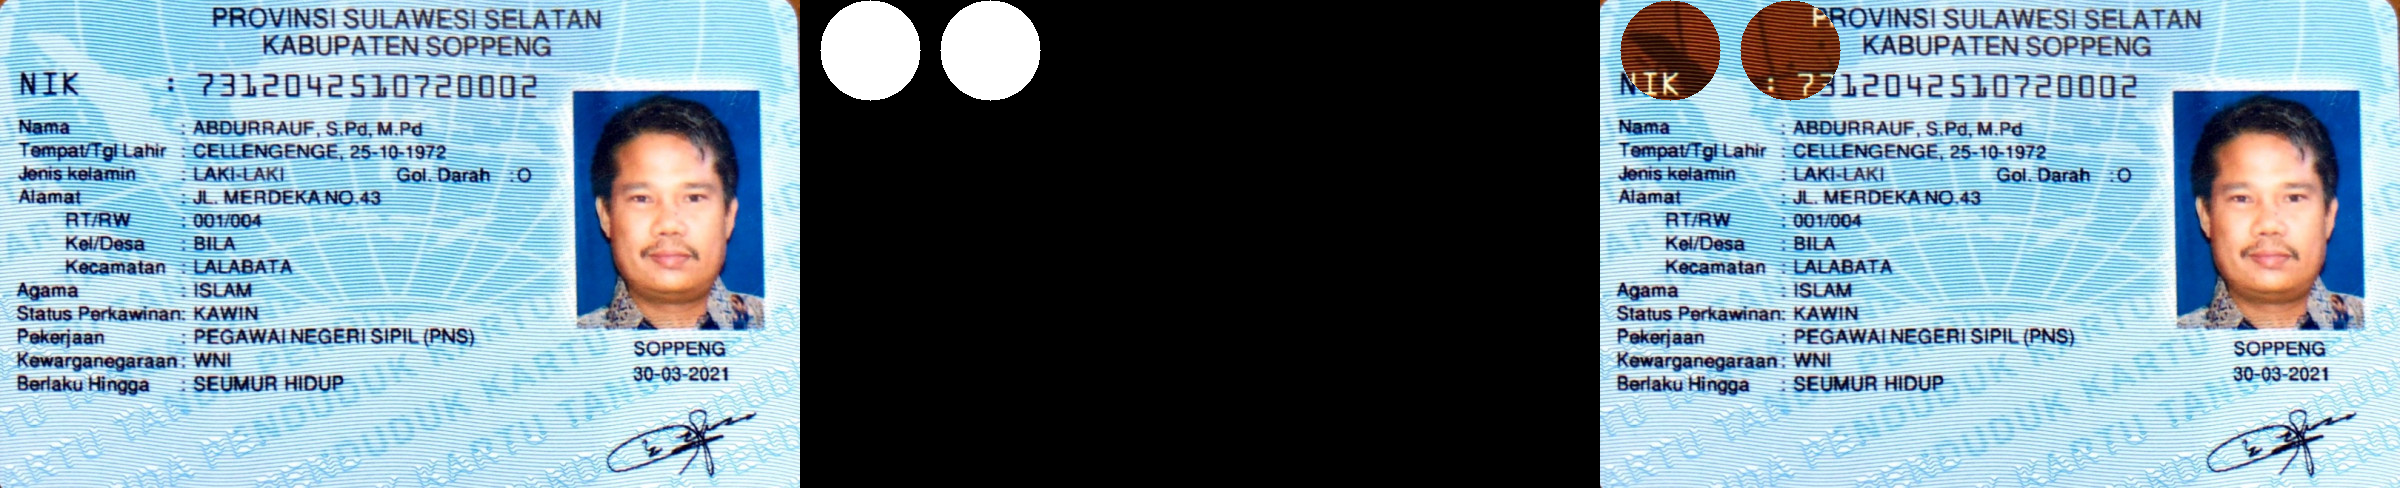

In [41]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpeg')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 50), 50, (255,255,255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask, (190, 50), 50, (255,255,255), -1)

result = cv.bitwise_xor(img, mask)

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)


operator XOR bagian yang beririsan dari image dan mask akan di tampilkan dengan hasil inverse dan bagian yang tidak beririsan antara image dan mask akan tetap di tampilkan seperti gambar image sebenarnya.